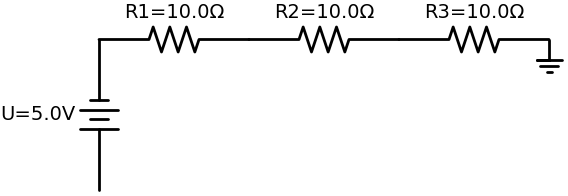

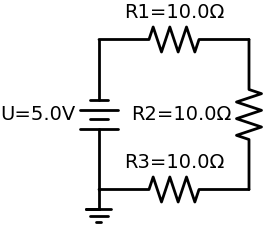

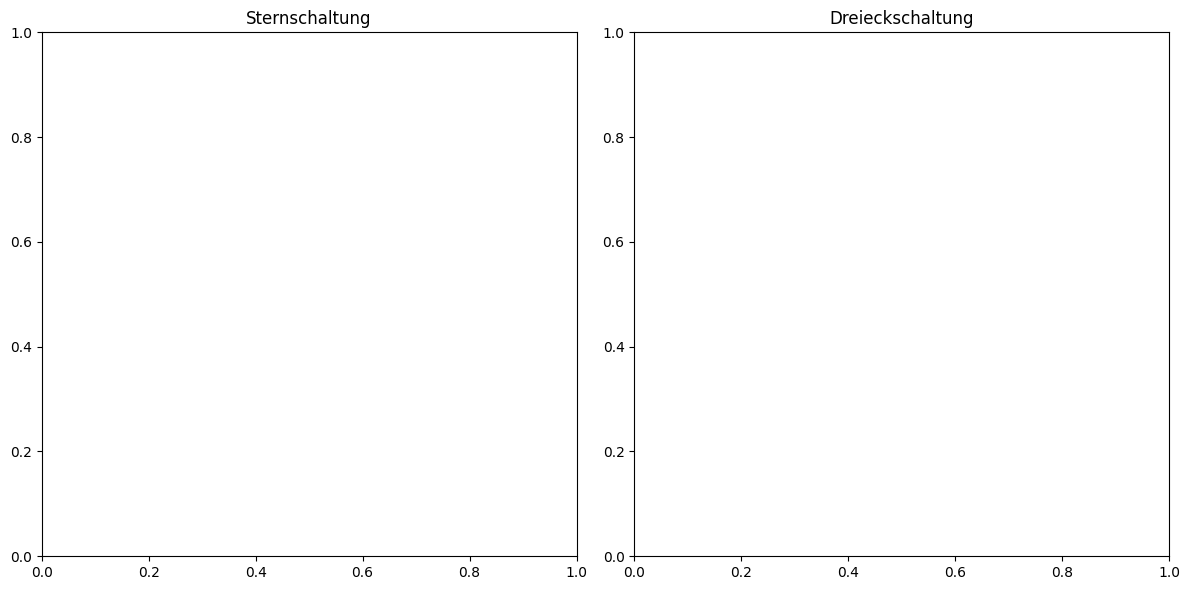

FloatSlider(value=10.0, description='R1 (Ω):', min=1.0, step=1.0)

FloatSlider(value=10.0, description='R2 (Ω):', min=1.0, step=1.0)

FloatSlider(value=10.0, description='R3 (Ω):', min=1.0, step=1.0)

FloatSlider(value=5.0, description='U1 (V):', max=20.0, min=1.0, step=1.0)

In [1]:
import schemdraw
import schemdraw.elements as e
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Funktion zum Zeichnen der Sternschaltung
def zeichne_sternschaltung(ax, R1, R2, R3, U1):
    with schemdraw.Drawing(ax=ax) as d:
        # Sternschaltung zeichnen
        d.add(e.Battery().up().label(f'U={U1}V'))
        d.add(e.Resistor().right().label(f'R1={R1}Ω'))
        d.add(e.Resistor().right().label(f'R2={R2}Ω'))
        d.add(e.Resistor().right().label(f'R3={R3}Ω'))
        d.add(e.Ground())
    ax.set_title("Sternschaltung")

# Funktion zum Zeichnen der Dreieckschaltung
def zeichne_dreieckschaltung(ax, R1, R2, R3, U1):
    with schemdraw.Drawing(ax=ax) as d:
        # Dreieckschaltung zeichnen
        d.add(e.Battery().up().label(f'U={U1}V'))
        d.add(e.Resistor().right().label(f'R1={R1}Ω'))
        d.add(e.Resistor().down().label(f'R2={R2}Ω'))
        d.add(e.Resistor().left().label(f'R3={R3}Ω'))
        d.add(e.Ground())
    ax.set_title("Dreieckschaltung")

# Widgets für Widerstände und Spannung
R1_widget = widgets.FloatSlider(value=10, min=1, max=100, step=1, description='R1 (Ω):')
R2_widget = widgets.FloatSlider(value=10, min=1, max=100, step=1, description='R2 (Ω):')
R3_widget = widgets.FloatSlider(value=10, min=1, max=100, step=1, description='R3 (Ω):')
U1_widget = widgets.FloatSlider(value=5, min=1, max=20, step=1, description='U1 (V):')

# Funktion zum Aktualisieren der Schaltpläne
def aktualisiere_schaltungen(change=None):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Erstelle zwei subplots nebeneinander
    zeichne_sternschaltung(axs[0], R1_widget.value, R2_widget.value, R3_widget.value, U1_widget.value)
    zeichne_dreieckschaltung(axs[1], R1_widget.value, R2_widget.value, R3_widget.value, U1_widget.value)
    plt.tight_layout()
    plt.show()

# Verknüpfe die Widgets mit der Aktualisierungsfunktion
R1_widget.observe(aktualisiere_schaltungen, names='value')
R2_widget.observe(aktualisiere_schaltungen, names='value')
R3_widget.observe(aktualisiere_schaltungen, names='value')
U1_widget.observe(aktualisiere_schaltungen, names='value')

# Initiale Anzeige der Schaltungen
aktualisiere_schaltungen()

# Anzeige der Widgets
display(R1_widget, R2_widget, R3_widget, U1_widget)


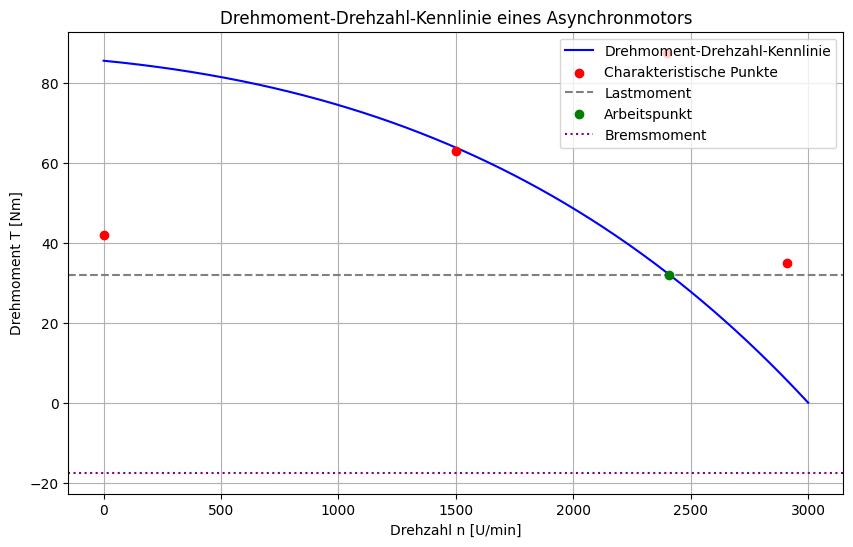

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Gegebene Werte
n_sync = 3000  # Synchrondrehzahl in U/min
s_nenn = 0.03  # Nennschlupf
T_nenn = 35    # Nennmoment in Nm
T_kipp = 2.5 * T_nenn  # Kippmoment
T_anlauf = 1.2 * T_nenn  # Anlaufmoment
T_sattel = 1.8 * T_nenn  # Sattelmoment
T_bremse = -0.5 * T_nenn  # Bremsmoment
T_last = 32   # Lastmoment in Nm

# Berechnung der Drehzahlen
n_nenn = (1 - s_nenn) * n_sync  # Nenndrehzahl
n_kipp = 0.8 * n_sync  # ca. 80% der Synchrondrehzahl
n_sattel = 0.5 * n_sync  # ca. 50% der Synchrondrehzahl
n_anlauf = 0  # Stillstand

# Drehzahlbereich von 0 bis n_sync
n = np.linspace(0, n_sync, 500)
s = 1 - n / n_sync  # Schlupf-Berechnung

# Modellierung der Drehmoment-Kennlinie mit einer Näherungsformel
T = T_kipp * (s / (s_kipp := n_sync / n_kipp)) * np.exp(1 - s / s_kipp)
T[T < T_bremse] = T_bremse  # Begrenzung des Bremsmoments

# Diagramm-Erstellung
plt.figure(figsize=(10, 6))
plt.plot(n, T, label='Drehmoment-Drehzahl-Kennlinie', color='b')

# Charakteristische Punkte
plt.scatter([n_anlauf, n_sattel, n_kipp, n_nenn],
            [T_anlauf, T_sattel, T_kipp, T_nenn],
            color='red', zorder=3, label='Charakteristische Punkte')

# Lastmoment als gestrichelte Linie
plt.axhline(y=T_last, color='gray', linestyle='dashed', label='Lastmoment')

# Arbeitspunkt
n_ap = np.interp(T_last, T[::-1], n[::-1])  # Interpolation für den Arbeitspunkt
plt.scatter(n_ap, T_last, color='green', zorder=4, label='Arbeitspunkt')

# Bremsmoment
plt.axhline(y=T_bremse, color='purple', linestyle='dotted', label='Bremsmoment')

# Achsenbeschriftung und Legende
plt.xlabel('Drehzahl n [U/min]')
plt.ylabel('Drehmoment T [Nm]')
plt.title('Drehmoment-Drehzahl-Kennlinie eines Asynchronmotors')
plt.legend()
plt.grid(True)
plt.show()


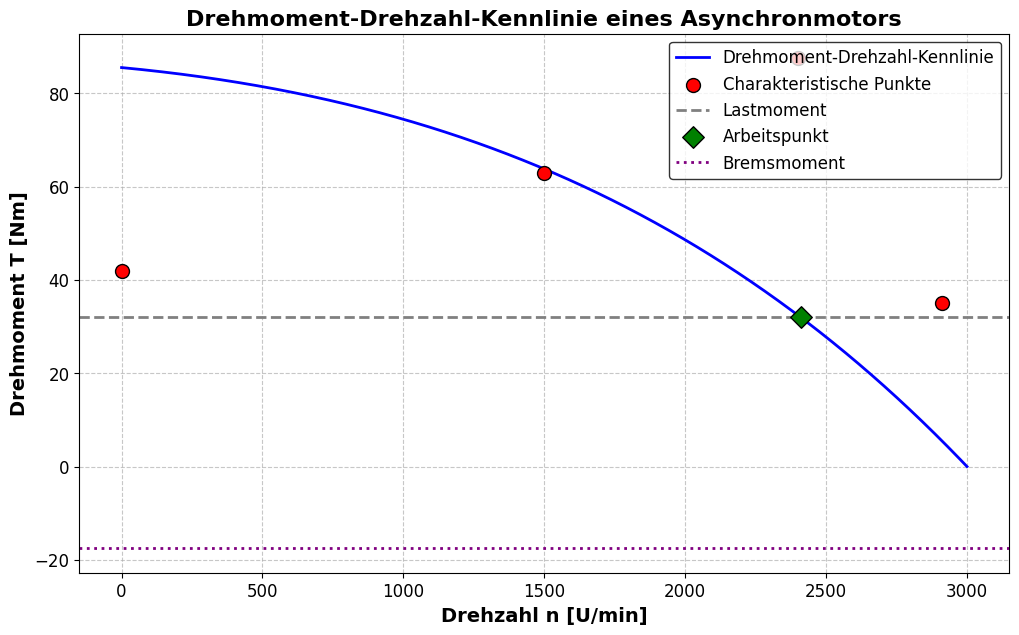

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Gegebene Werte
n_sync = 3000  # Synchrondrehzahl in U/min
s_nenn = 0.03  # Nennschlupf
T_nenn = 35    # Nennmoment in Nm
T_kipp = 2.5 * T_nenn  # Kippmoment
T_anlauf = 1.2 * T_nenn  # Anlaufmoment
T_sattel = 1.8 * T_nenn  # Sattelmoment
T_bremse = -0.5 * T_nenn  # Bremsmoment
T_last = 32   # Lastmoment in Nm

# Berechnung der Drehzahlen
n_nenn = (1 - s_nenn) * n_sync  # Nenndrehzahl
n_kipp = 0.8 * n_sync  # ca. 80% der Synchrondrehzahl
n_sattel = 0.5 * n_sync  # ca. 50% der Synchrondrehzahl
n_anlauf = 0  # Stillstand

# Drehzahlbereich von 0 bis n_sync
n = np.linspace(0, n_sync, 1000)
s = 1 - n / n_sync  # Schlupf-Berechnung

# Modellierung der Drehmoment-Kennlinie mit einer Näherungsformel
T = T_kipp * (s / (s_kipp := n_sync / n_kipp)) * np.exp(1 - s / s_kipp)
T[T < T_bremse] = T_bremse  # Begrenzung des Bremsmoments

# Diagramm-Erstellung
plt.figure(figsize=(12, 7))
plt.plot(n, T, label='Drehmoment-Drehzahl-Kennlinie', color='blue', linewidth=2)

# Charakteristische Punkte mit detaillierten Markierungen
plt.scatter([n_anlauf, n_sattel, n_kipp, n_nenn],
            [T_anlauf, T_sattel, T_kipp, T_nenn],
            color='red', s=100, edgecolors='black', zorder=3, label='Charakteristische Punkte')

# Lastmoment als gestrichelte Linie
plt.axhline(y=T_last, color='gray', linestyle='dashed', linewidth=2, label='Lastmoment')

# Arbeitspunkt
n_ap = np.interp(T_last, T[::-1], n[::-1])  # Interpolation für den Arbeitspunkt
plt.scatter(n_ap, T_last, color='green', s=120, edgecolors='black', marker='D', zorder=4, label='Arbeitspunkt')

# Bremsmoment
plt.axhline(y=T_bremse, color='purple', linestyle='dotted', linewidth=2, label='Bremsmoment')

# Verbesserte Achsenbeschriftung und Legende
plt.xlabel('Drehzahl n [U/min]', fontsize=14, fontweight='bold')
plt.ylabel('Drehmoment T [Nm]', fontsize=14, fontweight='bold')
plt.title('Drehmoment-Drehzahl-Kennlinie eines Asynchronmotors', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='best', frameon=True, edgecolor='black')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [ ]:
import numpy as np
import plotly.graph_objects as go

# Gegebene Werte
n_sync = 3000  # Synchrondrehzahl in U/min
s_nenn = 0.03  # Nennschlupf
T_nenn = 35    # Nennmoment in Nm
T_kipp = 2.5 * T_nenn  # Kippmoment
T_anlauf = 1.2 * T_nenn  # Anlaufmoment
T_sattel = 1.8 * T_nenn  # Sattelmoment
T_bremse = -0.5 * T_nenn  # Bremsmoment
T_last = 32   # Lastmoment in Nm

# Berechnung der Drehzahlen
n_nenn = (1 - s_nenn) * n_sync  # Nenndrehzahl
n_kipp = 0.8 * n_sync  # ca. 80% der Synchrondrehzahl
n_sattel = 0.5 * n_sync  # ca. 50% der Synchrondrehzahl
n_anlauf = 0  # Stillstand

# Drehzahlbereich von 0 bis n_sync
n = np.linspace(0, n_sync, 1000)
s = 1 - n / n_sync  # Schlupf-Berechnung

# Modellierung der Drehmoment-Kennlinie mit einer Näherungsformel
s_kipp = n_sync / n_kipp
T = T_kipp * (s / s_kipp) * np.exp(1 - s / s_kipp)
T[T < T_bremse] = T_bremse  # Begrenzung des Bremsmoments

# Charakteristische Punkte
char_points = {
    "Anlauf": (n_anlauf, T_anlauf),
    "Sattel": (n_sattel, T_sattel),
    "Kipp": (n_kipp, T_kipp),
    "Nenn": (n_nenn, T_nenn)
}

# Arbeitspunkt durch Interpolation finden
n_ap = np.interp(T_last, T[::-1], n[::-1])

# Plotly-Figur erstellen
fig = go.Figure()

# Drehmoment-Drehzahl-Kennlinie
fig.add_trace(go.Scatter(x=n, y=T, mode='lines', name='Drehmoment-Drehzahl-Kennlinie', line=dict(color='blue', width=2)))

# Charakteristische Punkte
for name, (nx, tx) in char_points.items():
    fig.add_trace(go.Scatter(x=[nx], y=[tx], mode='markers', name=name,
                             marker=dict(size=10, color='red', line=dict(color='black', width=2))))

# Lastmoment als gestrichelte Linie
fig.add_trace(go.Scatter(x=[0, n_sync], y=[T_last, T_last], mode='lines', name='Lastmoment',
                         line=dict(color='gray', dash='dash', width=2)))

# Arbeitspunkt
fig.add_trace(go.Scatter(x=[n_ap], y=[T_last], mode='markers', name='Arbeitspunkt',
                         marker=dict(size=12, color='green', symbol='diamond', line=dict(color='black', width=2))))

# Bremsmoment als gepunktete Linie
fig.add_trace(go.Scatter(x=[0, n_sync], y=[T_bremse, T_bremse], mode='lines', name='Bremsmoment',
                         line=dict(color='purple', dash='dot', width=2)))

# Layout-Anpassungen
fig.update_layout(
    title='Drehmoment-Drehzahl-Kennlinie eines Asynchronmotors',
    xaxis_title='Drehzahl n [U/min]',
    yaxis_title='Drehmoment T [Nm]',
    legend=dict(font=dict(size=12)),
    xaxis=dict(tickfont=dict(size=12)),
    yaxis=dict(tickfont=dict(size=12)),
    template='plotly_white'
)

# Diagramm anzeigen
fig.show()
